# Introduction to Data Science - Lab 5 - Exercise Solutions
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

In [1]:
%matplotlib inline
from ggplot import *
import pandas as pd
hit_albums = pd.read_csv("hit_albums.csv")

## Exercise Solutions
Create new DataFrames and plot that data using *ggplot*.

* **Plot the aggregate sum of all certified sales for each year.**
    - Recall in Lab 4, you created the DataFrame. 
    - One modification is necessary so that the headers are maintained.

In [2]:
artists_sales = hit_albums[["Released","Certified sales (millions)"]]
certsales_by_year = artists_sales.groupby("Released", as_index=False).sum()
certsales_by_year.head()

,Released,Certified sales (millions)
0,1967,13.1
1,1969,14.4
2,1970,25.0
3,1971,54.0
4,1973,22.7


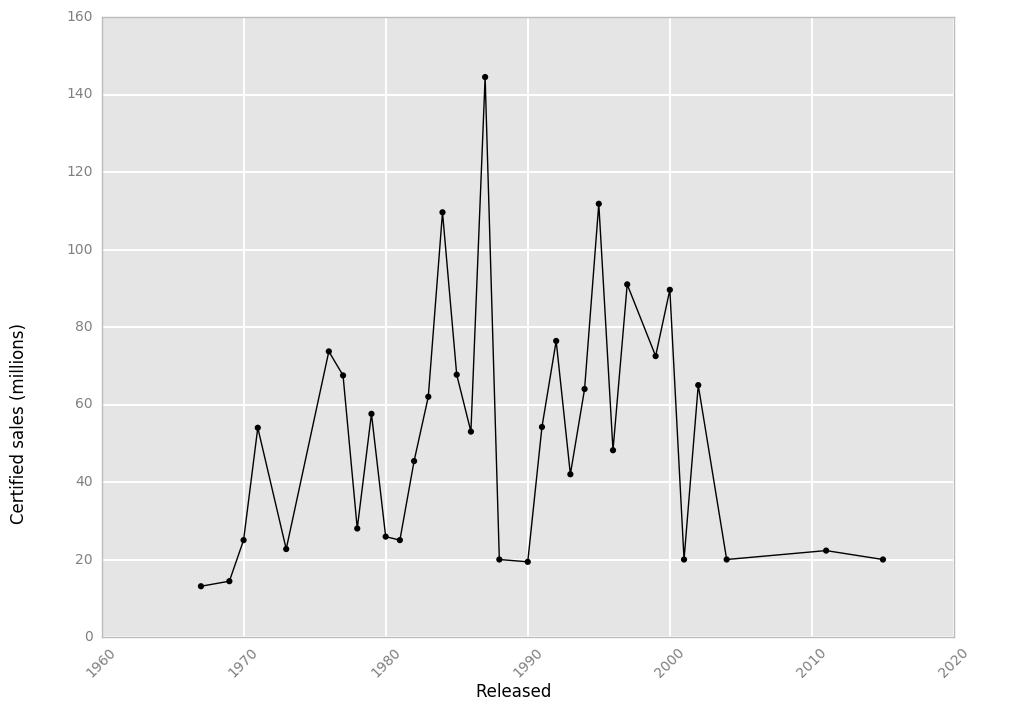

<ggplot: (-9223372036580572149)>

In [3]:
ggplot(certsales_by_year, aes(x="Released", y="Certified sales (millions)")) + \
    geom_point() + \
    geom_line() + \
    theme(axis_text_x=element_text(angle=45))

* **Find artists with exactly 3 hit albums and for each artist, plot his/her album's release date against its certified sales.**
    - Recall you did a similar exercise in Lab 4. 
    - There are numerous ways to plot this information. See below for 2 possible solutions.

In [4]:
three_hit_artist = hit_albums["Artist"].value_counts()==3
mask = hit_albums["Artist"].apply(lambda x: three_hit_artist[x])
three_hits = hit_albums[mask]
three_hits

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
8,Shania Twain,Come On Over,1997,"Country, pop",29.6,39.0
13,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,1967,Rock,13.1,32.0
17,Various artists,Dirty Dancing,1987,"Pop, rock, R&B",17.9,32.0
19,The Beatles,1,2000,Rock,21.6,31.0
21,The Beatles,Abbey Road,1969,Rock,14.4,30.0
25,Madonna,The Immaculate Collection,1990,"Pop, Dance",19.4,30.0
34,Various artists,Grease: The Original Soundtrack from the Motio...,1978,Soundtrack,28.0,NaN
39,Madonna,Like a Virgin,1984,"Pop, dance",25.0,NaN
40,Madonna,True Blue,1986,Pop,25.0,NaN
68,Shania Twain,The Woman in Me,1995,"Country, pop",20.0,NaN


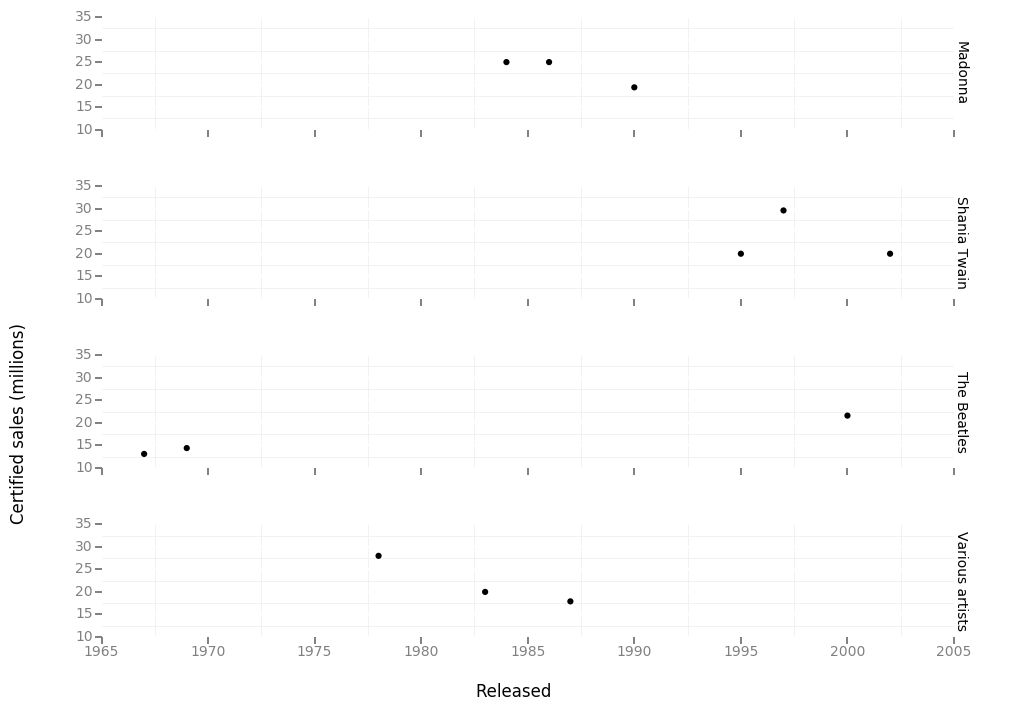

<ggplot: (293794838)>

In [5]:
ggplot(three_hits, aes(x="Released", y="Certified sales (millions)")) + \
    geom_point() + \
    facet_grid(x="Artist") + \
    theme_bw()

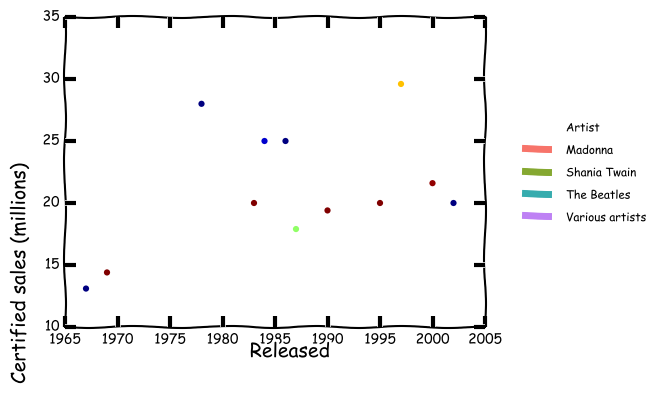

<ggplot: (293626821)>

In [6]:
ggplot(three_hits, aes(x="Released", y="Certified sales (millions)", color="Artist")) + \
    geom_point() + \
    theme_xkcd()